In [1]:
import pandas as pd
import numpy as np

In [2]:
import zipfile

## Open csv

Here is a trick to read csv directly from zip file without decompressing. It's quite friendly to kaggle projects.

In [3]:
z = zipfile.ZipFile('../bike-sharing-demand.zip')

In [4]:
data = pd.read_csv(z.open('train.csv'), encoding='utf8')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Data types of each column

Keep an eye for any 'object' data type. You basically want to avoid that.

In [5]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

## Re-read the CSV

This time ask pandas to parse the column 0 as datetime type

In [6]:
data = pd.read_csv(z.open('train.csv'), encoding='utf8', parse_dates=[0])
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
data.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

## Check if there is any NaN or duplicated datum.

Normally datasets from kaggle are quite clean without NaN number or duplicated rows. If there was, check again or simply drop them.

In [8]:
data.isna().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

In [8]:
data.duplicated().any()

False

## Another way to address NaN (visually) is using the missingno lib

https://github.com/ResidentMario/missingno

In [11]:
import missingno as msno

ModuleNotFoundError: No module named 'missingno'

In [12]:
msno.matrix(data)

NameError: name 'msno' is not defined

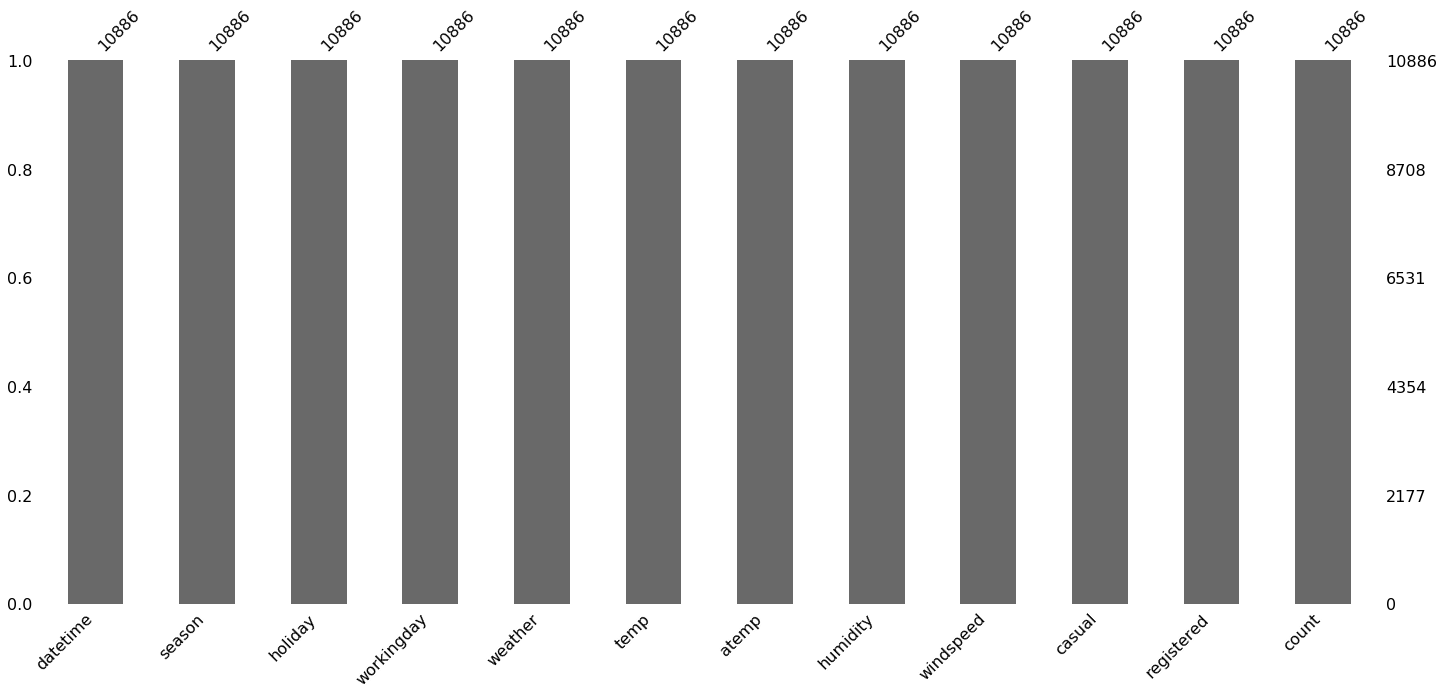

In [13]:
msno.bar(data)

## Save data for further usage

Do Not Repeat Yourself

In [13]:
data.to_pickle("../data.pkl.xz", compression="infer")